In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr,cr)

In [1]:
%matplotlib inline

In [7]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

no gates, so build gates.  Need a Hadimard gate, H

In [9]:
circuit.h(qr[0])

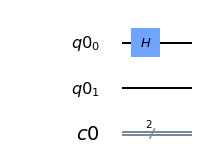

In [10]:
circuit.draw(output='mpl')

In [11]:
print(qr[0])

Qubit(QuantumRegister(2, 'q0'), 0)


In [15]:
dir(qr)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bits',
 'bit_type',
 'instances_counter',
 'name',
 'prefix',
 'qasm',
 'size']

In [14]:
dir(circuit)

['AND',
 'OR',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append',
 '_bind_parameter',
 '_bit_argument_conversion',
 '_check_cargs',
 '_check_compatible_regs',
 '_check_dup_param_spec',
 '_check_dups',
 '_check_qargs',
 '_create_creg',
 '_data',
 '_increment_instances',
 '_layout',
 '_parameter_table',
 '_rebind_definition',
 '_substitute_parameters',
 '_unroll_param_dict',
 '_update_parameter_table',
 'add_register',
 'append',
 'barrier',
 'bind_parameters',
 'cast',
 'cbit_argument_conversion',
 'ccx',
 'ch',
 'clbits',
 'cls_instances',
 'cls_prefix',
 'cnot',
 'combine',
 'copy',
 'count_ops',
 'cregs',
 

In [20]:
dir(qr[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'index',
 'register']

In [24]:
qr[0].register

QuantumRegister(2, 'q0')

build a controlled x.     this has an "if then "  going on. the if is going to be the first qbit, qr[0].the target is going to be the second qbit qr[1]. so if q[0],then q[1]

In [26]:
circuit.cx(qr[0],qr[1])

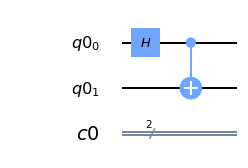

In [27]:
circuit.draw(output='mpl')

That is a Hadamard gate (q00) and a "control not" (q01).    controlled_not == controlled-x      see https://quantum-computing.ibm.com/support/guides/gate-overview?section=5d00d964853ef8003c6d6820#h-gate 

we are able to generate entanglement. q[0] and q[1]  with 2 simple operations.  We just built our quantum circuit

so now....  we want to measure our qbits and store them into the classical registers

In [28]:
circuit.measure(qr,cr)

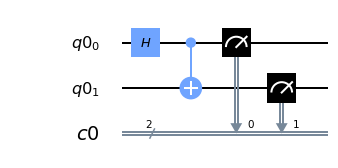

In [29]:
circuit.draw(output='mpl')

now we want to run/execute this circuit. first on mac then on cloud qc at IBM. 
we'll run with a simulator first. the simulator is called aer (pronouced air).  qasm (pronouced chasm) is quantum assembly language

In [31]:
simulator = Aer.get_backend('qasm_simulator')

In [32]:
execute(circuit, backend = simulator)

get result

In [34]:
result = execute(circuit, backend = simulator).result()

In [41]:
print(result)   #blah

Result(backend_name='qasm_simulator', backend_version='0.4.0', date=datetime.datetime(2020, 2, 19, 19, 0, 11, 925147), header=Obj(backend_name='qasm_simulator', backend_version='0.4.0'), job_id='fbbccb90-c477-45c5-ad7c-1204438415e0', metadata={'max_memory_mb': 8192, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.002998639}, qobj_id='8af0d066-3e8f-465f-bb96-4dc57f500eef', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=484, 0x3=540)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=2, name='circuit0', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 16}, seed_simulator=1873996116, shots=1024, status='DONE', success=True, time_taken=0.002883707)], status='COMPLETED', success=True, time_taken=0.006273984909057617)


In [38]:
from qiskit.tools.visualization import plot_histogram

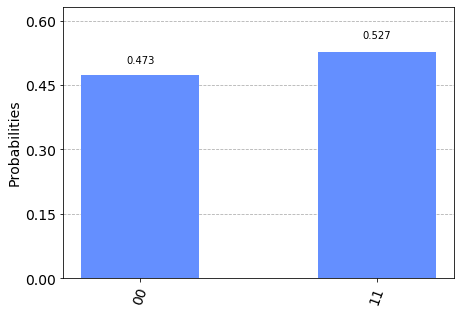

In [46]:
plot_histogram(result.get_counts(circuit))    #better!

now run on ibm. have to use or api token. a8112fef248a1062a02d56d421437abf3c2bb85091299838b15a50cdbb2079dda9e15c669a9465d329543de3548c69af54c303fe2cd540df433a7e2490ffcee4


In [48]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [49]:
provider = IBMQ.get_provider('ibm-q')

In [50]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [51]:
job = execute(circuit, backend=qcomp)

In [53]:
from qiskit.tools.monitor import job_monitor

In [54]:
job_monitor(job)

Job Status: job has successfully run


In [56]:
result_again = job.result() 

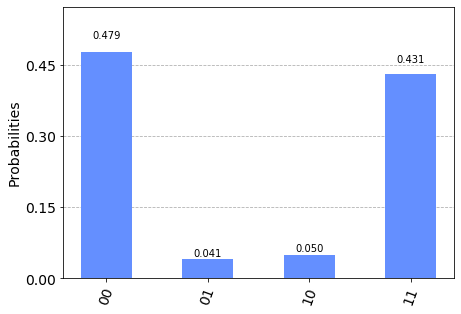

In [57]:
plot_histogram(result_again.get_counts(circuit)) 

In [58]:
from qiskit.tools.monitor import backend_overview

In [59]:
backend_overview()

/Users/marklaney/miniconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:366: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '
/Users/marklaney/miniconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:377: UserWarning: `rep_time` now has units of seconds(s) rather than microseconds(mu s).
  warnings.warn('`rep_time` now has units of seconds(s) rather '


ibmq_armonk                  ibmq_essex                   ibmq_burlington
-----------                  ----------                   ---------------
Num. Qubits:  1              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 3              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      125.4          Avg. T1:      99.2           Avg. T1:      79.0
Avg. T2:      136.7          Avg. T2:      135.2          Avg. T2:      71.0



ibmq_london                  ibmq_ourense                 ibmq_vigo
-----------                  ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 69             Pending Jobs: 1
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Op